<a href="https://colab.research.google.com/github/redhalcyon/ORS_Class/blob/main/%EC%88%99%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사진을 불러오기위한 팩키지 rasterion를 설치합니다.

In [2]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.3 MB/s 


분석에 필요한 패키지들 로딩합니다.


In [3]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

불러올 파일 이름 지정하고,

In [4]:
fname_img = "Dokdo.png"

사진파일을 구글드라이브에 올리고 링크 복사하여 ID를 입력해서 사진 경로 지정해줍니다.

In [16]:
! gdown --id 1Y9HHnagRnDtnRhajq30aAU4-s8df_iir

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Y9HHnagRnDtnRhajq30aAU4-s8df_iir
To: /content/Dokdo.png
100% 916k/916k [00:00<00:00, 165MB/s]


사진 연결상태 확인!

In [17]:
os.path.isfile(fname_img)

True

img로 불러서 사진 확인합니다.

In [19]:
img = rasterio.open(fname_img)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


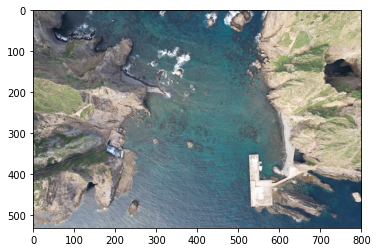

In [20]:
show(img)

In [21]:
type(img)

rasterio.io.DatasetReader

img 파일의 data type 확인하고, 사진의 픽셀을 array 형태로 불러옵니다.

In [22]:
I = img.read()

사진의 픽셀 dimention 확인합니다.

In [23]:
I.shape

(4, 530, 800)

# 사진 파일이 png 포멧이어서 RGB 외에 알파값이 포함되어 band가 4개로 인식됩니다..(png 파일은 알파값 확인!)
 픽셀의 사이즈는 530*800으로 정확히 나옴

png 파일의 알파값을 빼고 다시 "Dokdo_1.png" 파일로 저장해서 다시 코딩... 

In [25]:
fname_img = "Dokdo_1.png"

In [26]:
! gdown --id 1kICpBYqnBPfRtMSNbfvHFvt2SXf6G1y5

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kICpBYqnBPfRtMSNbfvHFvt2SXf6G1y5
To: /content/Dokdo_1.png
100% 825k/825k [00:00<00:00, 170MB/s]


확인!

In [31]:
os.path.isfile(fname_img)

True

In [32]:
img = rasterio.open(fname_img)

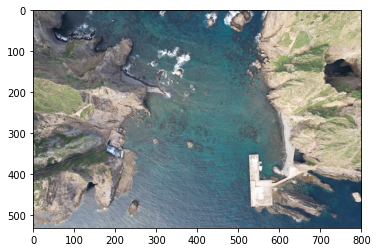

In [33]:
show(img)

In [34]:
type(img)

rasterio.io.DatasetReader

In [38]:
I = img.read()

In [39]:
I.shape

(3, 530, 800)

band 값이 3으로(RGB, 알파값은 제거됨), 사진의 사이즈도 정상으로 인식합니다.

data type도 확인합니다.

In [40]:
type(I)

numpy.ndarray

band 값(3)을 제일 뒤로 보내주고요,

In [53]:
I = np.swapaxes(I, 0, 2)

In [54]:
I.shape

(800, 530, 3)

가로 * 세로 * 밴드로 정렬 확인됩니다.

800*530 영상을 한 줄로 정렬해줍니다.

In [55]:
X = I.reshape((800*530, 3))

In [56]:
X.shape

(424000, 3)

I의 원래화소 위치 확인합니다.

In [59]:
I[0,1,:]

array([140, 142, 137], dtype=uint8)

In [60]:
X[1, :]

array([140, 142, 137], dtype=uint8)

In [61]:
I[1, 0, :]

array([98, 99, 94], dtype=uint8)

In [63]:
X[530, :]

array([98, 99, 94], dtype=uint8)

# PCA 돌리기

In [64]:

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [65]:
print(pca.components_)

[[ 0.71999008  0.55547397  0.41600836]
 [-0.59027248  0.17492511  0.78802259]
 [-0.36495573  0.81292674 -0.45382534]]


In [66]:
x1 = pca.components_[:,0]
x2 = pca.components_[:,1]
np.dot(x1, x1)

1.0000000000000002

In [67]:
np.dot(x1, x2)

5.551115123125783e-17

In [68]:
print(pca.explained_variance_)

[6128.12694353  318.05374083   50.60593132]


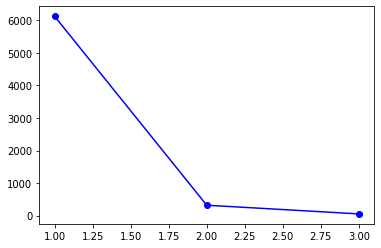

In [69]:

plt.plot(np.arange(3)+1, pca.explained_variance_, 'bo-')

In [70]:
X_pca = pca.transform(X)

In [71]:
X_pca.shape

(424000, 3)

원 자료의 dimention과 일치함을 확인하고,

변환된 값들의 범위를 확인하기 위해서 scatter plot 작성해 봅니다.

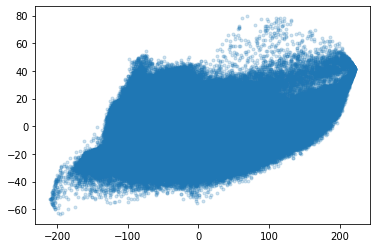

In [72]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', alpha=0.2)

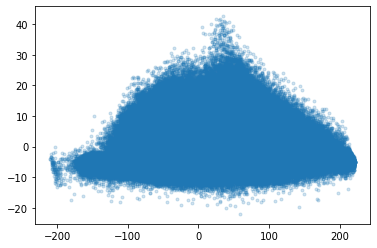

In [73]:
plt.scatter(X_pca[:, 0], X_pca[:, 2], marker='.', alpha=0.2)

In [74]:
I_pca = X_pca.reshape(800, 530, 3)

In [75]:
I_pca = np.swapaxes(I_pca, 0, 1)

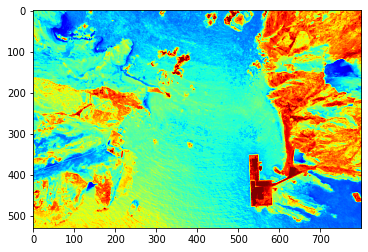

In [76]:
plt.imshow(I_pca[:,:,0], cmap='jet', vmin=-200, vmax=200)
plt.show()

독도의 암반과 콘크리트 구조물(선착장)은 밝은 값(빨강)으로 표현되고, 해수면과 풀, 나무와 같은 식생은 상대적으로 낮은 값(파랑)을 나타내고 있습니다.

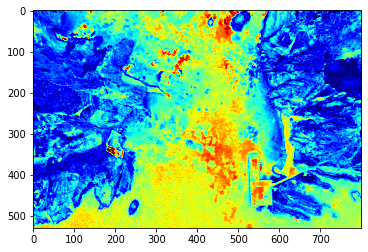

In [77]:
plt.imshow(I_pca[:,:,1], cmap='jet', vmin=-30, vmax=50)
plt.show()

두번째 주성분 이미지는 백파등의 빛의 반사도가 높은 곳이 높은 값(빨강)으로 잡혔고, 암반과 식생은 매우 낮은 값(파랑)으로 잡혔습니다. 

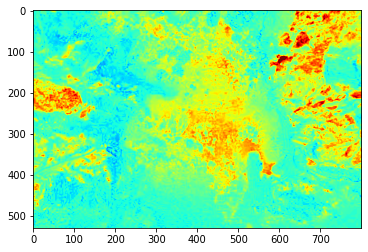

In [78]:
plt.imshow(I_pca[:,:,2], cmap='jet', vmin=-30, vmax=30)
plt.show()

마지막 이미지는 식생이 높은 곳이 빨강으로 표현되고 있습니다. 또한, 녹색의 해수면 부분도 빨강으로 표현됩니다.

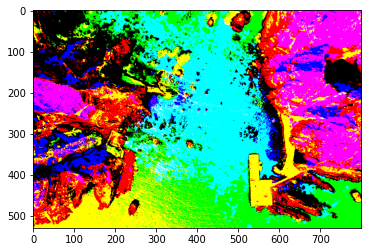

In [79]:
plt.imshow(I_pca)
plt.show()

각각의 주성분 영상을 RGB로 지정해서 표현한 이미지 입니다. 인공구조물과 암반, 식생의 차이가 구별되는 이미지 입니다.